# Necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# single run grapher

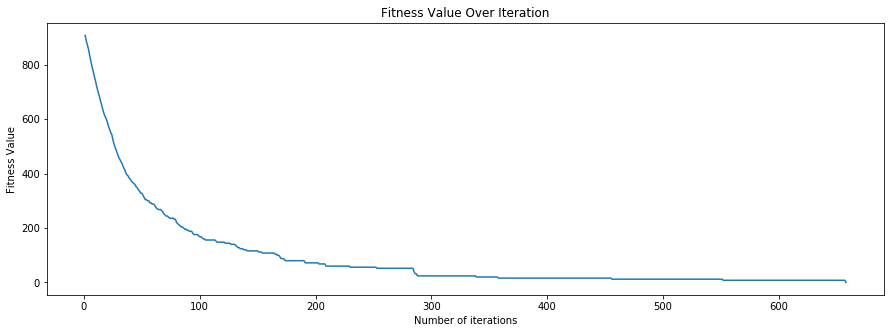

In [16]:
data = np.genfromtxt('../logs/local_search_success_run_iteration.txt', delimiter=',')
plt.figure(figsize=(15,5))
plt.plot(data[:,0], data[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Fitness Value")
plt.title("Fitness Value Over Iteration")
plt.savefig("../project_report/16_100_iteration.png")
plt.show()


# Multi-Run Combiner

In [4]:
import numpy as np
empty = 90
num_files = 17
index = 0
data = []
for i in range(num_files):
    temp = np.genfromtxt("../logs/"+str(empty)+"_"+str(i+1)+".txt", delimiter=',')
    for row in temp:
        data.append([index, row[1], row[2]])
        index += 1
data = np.array(data)
print(data.shape)
np.savetxt("../logs/"+str(empty)+".txt", data, delimiter=',')

(106, 3)


# Statistic Finder

In [8]:
import numpy as np
for i in range(10, 160, 10):
    temp = np.genfromtxt("../logs/backtrack_"+str(i)+".txt", delimiter=',')
    size = len(temp)
    shit = np.max(temp,axis=0)
    print("{},{}".format(i, shit[2]))

10,1.0
20,1.0
30,2.0
40,1.0
50,1.0
60,2.0
70,3.0
80,2.0
90,4.0
100,3.0
110,4.0
120,17.0
130,2166.0
140,141872.0
150,427608.0


# Multi-Run Grapher

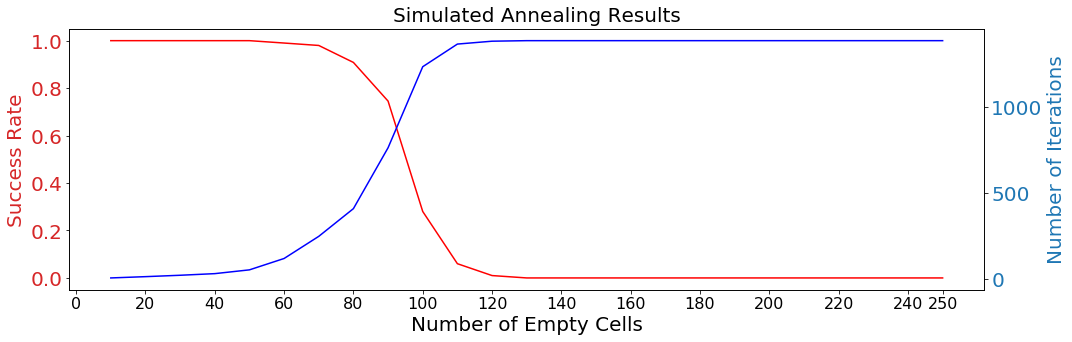

In [41]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../logs/important_statistics.txt', delimiter=',')

fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

color = 'tab:red'
ax1.set_xlabel('Number of Empty Cells', fontsize=20)
ax1.set_ylabel('Success Rate', color=color, fontsize=20)
plt.plot(data[:,0], data[:,1], 'r', label="success rate")
ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.set_xticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 250])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Number of Iterations', color=color, fontsize=20)  # we already handled the x-label with ax1
plt.plot(data[:,0], data[:,2], 'b', label="number of iterations")
ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figtext(.5,0.9,'Simulated Annealing Results', fontsize=20, ha='center')
plt.subplots_adjust(top=0.88)
#plt.show()


plt.savefig("../project_report/simulated_annealing_results.png")

# Backtrack Mean and Max + Extrapolaters

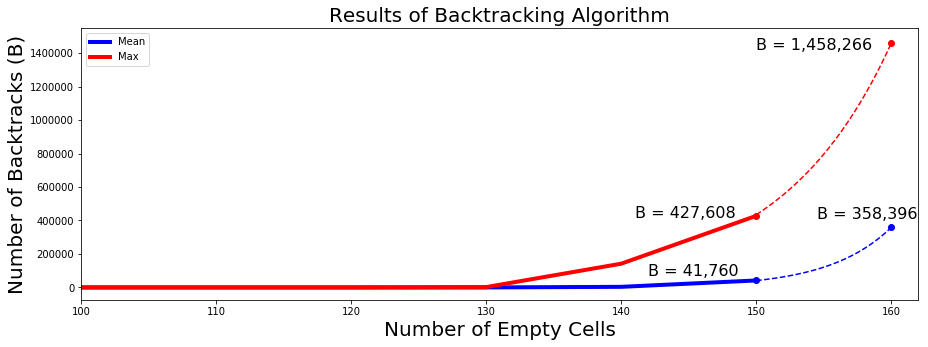

In [191]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))
meandata = np.genfromtxt('../logs/backtrack_mean.txt', delimiter=',')
maxdata = np.genfromtxt('../logs/backtrack_max.txt', delimiter=',')

inner_coef_mean, outer_coef_mean = np.polyfit(meandata[:,0],  np.log(meandata[:,1]), 1, w=np.sqrt(meandata[:,1]))
inner_coef_max, outer_coef_max = np.polyfit(maxdata[:,0], np.log(maxdata[:,1]), 1, w=np.sqrt(maxdata[:,1]))

plt.plot(meandata[:,0], meandata[:,1], 'b', linewidth=4, label="Mean")
plt.plot(maxdata[:,0], maxdata[:,1], 'r', linewidth=4, label="Max")

fake_x = np.linspace(150, 160, num=100)
plt.plot(fake_x, np.exp(outer_coef_mean) * np.exp(inner_coef_mean * fake_x), 'b--')
plt.plot(fake_x, np.exp(outer_coef_max) * np.exp(inner_coef_max * fake_x), 'r--')

line_x = np.linspace(10, 150, num=2)
max_mean = np.max(meandata[:,1])
max_max = np.max(maxdata[:,1]) 
expected_mean = np.exp(outer_coef_mean) * np.exp(inner_coef_mean * 160)
expected_max = np.exp(outer_coef_max) * np.exp(inner_coef_max * 160)
plt.text(141, max_max-10000, "B = 427,608", fontsize=16)
plt.text(142, max_mean+30000, "B = 41,760", fontsize=16)
plt.text(150, expected_max-40000, "B = 1,458,266", fontsize=16)
plt.text(154.5, expected_mean+50000, "B = 358,396", fontsize=16)
plt.scatter([150, 160], [max_max, expected_max], color='r')
plt.scatter([150, 160], [max_mean, expected_mean], color='b')

plt.legend()
plt.xlabel("Number of Empty Cells", fontsize=20)
plt.ylabel("Number of Backtracks (B)", fontsize=20)
plt.title("Results of Backtracking Algorithm", fontsize=20)
plt.xlim((100, 162))
plt.savefig("../project_report/backtrack.png")
plt.show()

# Genetic Algorithm Probability Curve

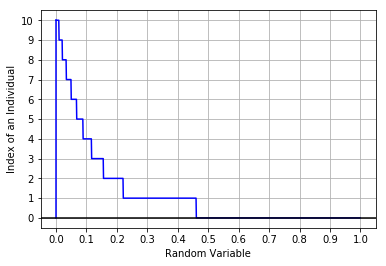

In [81]:
from matplotlib import ticker

population_size = 10
thresh = 0.23
x = np.arange(0,1, 0.001)
y = np.floor(np.exp(population_size * (thresh - x))+0.90)
y[y>10] = 10

# plot
plt.figure()
plt.rcParams['axes.grid'] = True
shit = np.arange(0,1, 0.1)
shat = np.arange(0,10, 1)
xloc = ticker.MultipleLocator(base=0.1)
yloc = ticker.MultipleLocator(base=1)
plt.gca().xaxis.set_major_locator(xloc)
plt.gca().yaxis.set_major_locator(yloc)
plt.xlim([-0.05,1.05])
plt.xlabel("Random Variable")
plt.ylabel("Index of an Individual")

plt.plot(x,y, 'b')
plt.plot([0,0],[0,10], 'b')
plt.plot([-0.1,1.1],[0,0], 'k')
plt.savefig("geneic_algorithm_probability_curve.png")